## A Simple Keras CNN trained on CIFAR-10 dataset with over 88% accuracy

import libraries

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras import utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

<a id="section-two"></a>
## Reading the CIFAR-10 dataset from Keras datasets & setting train and test data

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

<a id="section-three"></a>
## EDA (Exploratory Data Analysis)

 Checking the number of rows (records) and columns (features)

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Creating a list of all the class labels

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Visualizing some of the images from the training dataset


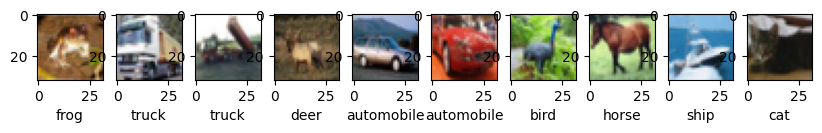

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize = (10, 1))
for i in range (10):    # for first 10 images
    axes[i].imshow(train_images[i], cmap=plt.cm.binary)
    axes[i].set_xlabel(class_names[train_labels[i][0]])

<a id="section-four"></a>
## Data Preprocessing

* The reason for Standardizing/Normalizing is to convert all pixel values to values between 0 and 1.
* The reason for converting type to float is that to_categorical (one hot encoding) needs the data to be of type float by default.
* The reason for using to_categorical is that the loss function that we will be using in this code (categorical_crossentropy) when compiling the model needs data to be one hot encoded.


Standardizing (255 is the total number of pixels an image can have). The reason for Standardizing/Normalizing is to convert all pixel values to values between 0 and 1.

In [10]:
train_images = train_images / 255
test_images = test_images / 255

One hot encoding the target class (labels).
The reason for using to_categorical is that the loss function that we will be using in this code (categorical_crossentropy) when compiling the model needs data to be one hot encoded.

In [11]:
num_classes = 10
train_labels = utils.to_categorical(train_labels, num_classes)
test_labels = utils.to_categorical(test_labels, num_classes)

<a id="section-five"></a>
## Building the CNN Model using Keras

<a id="section-six"></a>
### Setting up the Layers

Creating a sequential model and adding layers to it

Input (32, 32, 3)

   | ----- Conv2D(32, (3,3), relu) ------ BatchNormalization ------ Conv2D(32, (3,3), relu) ----- BatchNormalization ----- MaxPooling2D(2,2) ----- Dropout(0.3)
   | 

   | ----- Conv2D(64, (3,3), relu) ------ BatchNormalization ------ Conv2D(64, (3,3), relu) ----- BatchNormalization ----- MaxPooling2D(2,2) ----- Dropout(0.5)
   | 
   
   | ----- Conv2D(128, (3,3), relu) ----- BatchNormalization ------ Conv2D(128, (3,3), relu) ----- BatchNormalization ----- MaxPooling2D(2,2) ----- Dropout(0.5)
   | 
   
   | ----- Flatten ----- Dense(128, relu) ----- BatchNormalization ----- Dropout(0.5)
   | 
   
   | ----- Dense(num_classes, softmax)
   
Output (num_classes)


In [12]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

<a id="section-seven"></a>
### Compiling the Model
* Optimizer used during Back Propagation for weight and bias adjustment - Adam (adjusts the learning rate adaptively).
* Loss Function used - Categorical Crossentropy (used when multiple categories/classes are present).
* Metrics used for evaluation - Accuracy.

In [14]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

### Fitting the Model
Epochs - One epoch is one complete cycle (forward pass + backward pass).

In [16]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=100,
                    validation_data=(test_images, test_labels))

read the model

In [18]:
from tensorflow.keras.models import load_model
model = load_model('./cnn_model.h5')

read and analize the train proccessing

In [20]:
import pandas as pd
history = pd.read_csv('cnn_model.csv')

<a id="section-nine"></a>
## Visualizing the Evaluation

* Loss Curve - Comparing the Training Loss with the Testing Loss over increasing Epochs.
* Accuracy Curve - Comparing the Training Accuracy with the Testing Accuracy over increasing Epochs.

Text(0.5, 1.0, 'Loss Curves')

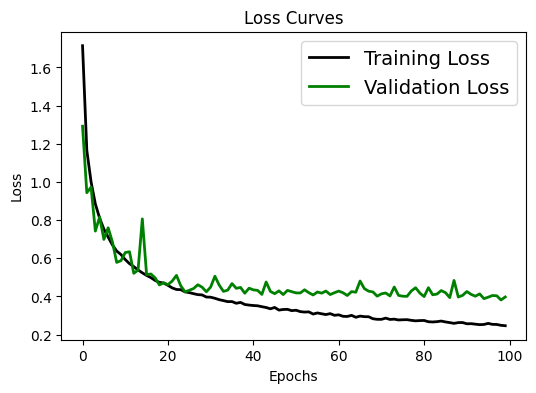

In [22]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history['loss'], 'black', linewidth=2.0)
plt.plot(history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

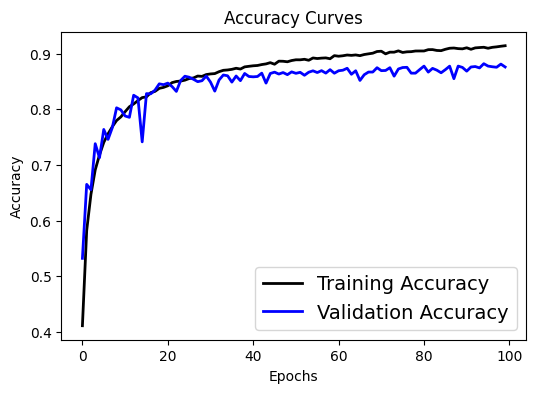

In [23]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history['accuracy'], 'black', linewidth=2.0)
plt.plot(history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

<a id="section-ten"></a>
## Predicting the Result

Here is the fun part. Let's take 25 images from the testing data and see how many of it we predicted correctly.

Making the Predictions

In [24]:
pred = model.predict(test_images)
print(pred)

313/313 [==============================] - 7s 23ms/step
[[8.2781895e-07 6.1702508e-08 9.1683523e-06 ... 6.1995188e-08
  3.5866191e-07 5.8275504e-09]
 [2.6034424e-05 2.2057327e-04 7.9235141e-10 ... 1.5044950e-11
  9.9975246e-01 9.7618340e-07]
 [1.9972255e-04 2.2092948e-03 1.1219795e-05 ... 3.7858842e-06
  9.9739408e-01 1.4555796e-04]
 ...
 [4.5509010e-10 2.5315103e-09 1.0022511e-06 ... 1.3948560e-06
  3.8973416e-09 1.5939137e-09]
 [1.0146442e-03 9.9883980e-01 3.9322463e-06 ... 2.0522241e-06
  4.9085178e-05 7.4222080e-05]
 [5.6934518e-10 4.3069867e-11 4.5481327e-10 ... 9.9999714e-01
  4.8956152e-11 1.6068575e-11]]


Converting the predictions into label index

In [25]:
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[3 8 8 ... 5 1 7]


Plotting the Actual vs. Predicted results

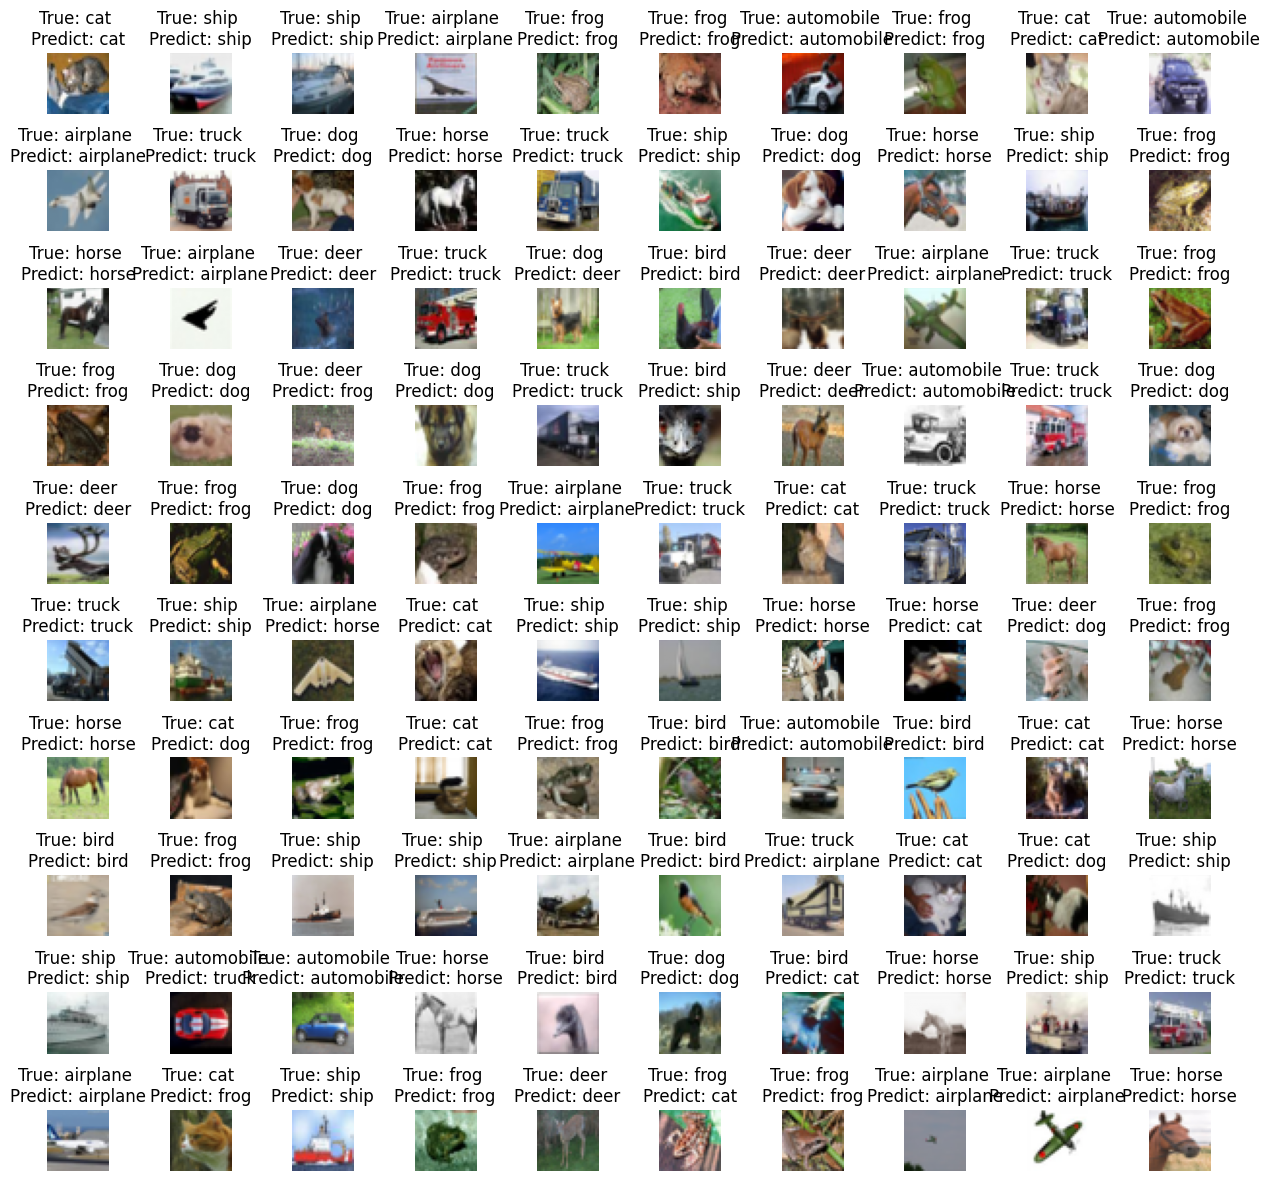

In [26]:
fig, axes = plt.subplots(10, 10, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 100):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)